In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from datetime import date
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns
from scipy.stats import chi2_contingency
from google.colab import drive
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import mutual_info_classif
from numpy import array

!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.2 MB/s eta 0:00:00


In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load features and labels excel and then merge
#df_features = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_problem_features_final.xlsx", sheet_name=0, na_values="NaN")
#df_labels = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_ticket_labeling.xlsx", sheet_name=0, na_values="NaN")

In [ ]:
#df_labels['problem_label_melina'].astype('int', errors='ignore')
#df_labels['problem_label_philipp'].astype('int', errors='ignore') 
#df_labels['solution_label_melina'].astype('int', errors='ignore') 
#df_labels['solution_label_philipp'].astype('int', errors='ignore')
#df_labels['solution_labels_merged'].astype('int', errors='ignore') 
#df_labels['solution_labels_merged'].astype('int', errors='ignore')  

0      1
1      1
2      1
3      1
4      1
      ..
202   -1
203    1
204    1
205   -1
206    0
Name: solution_labels_merged, Length: 207, dtype: int64

In [3]:
# export merged excel
#df.to_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_problem_merging_features_and_labels.xlsx")

# import excel
df = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_solution_merging_features_and_labels.xlsx", sheet_name=0, na_values="NaN")

In [4]:
df['solution_labels_merged'].value_counts()
df = df[(df.solution_labels_merged ==1) | (df.solution_labels_merged ==0)]

In [6]:
#TODO: tf-idf hinzufügen & weitere hinzufügen:

    # refrences(Solution)
    # spelling_mistakes(Solution)
    # 

    # .......
    # 'main_cat',
    #'sub1',
    #'sub2',
    #'sub3',
    #'count_categories',
    #'topic_probs'
  
  

features_set= [
    'sentences_count',
    'words_count',
    'words_per_sentence',
    'stop_words_count',
    'words_count_no_stop_words',
    'words_per_sentence_no_stop_words',
    'verbs_count',
    'nouns_count',
    'pronoun_count',
    'Flesch',
    'Coleman',
    'Gunning',
    'links_count',
    'attachments_count',
    'sentiment_score',
    'sentiment',
    'language_confidence',
    'inquery_intensity',
    'special_characters',
    'bulleted_list',
    'bulleted_list_count',
    'spelling_mistakes',
    'pos_tagging_max_depth',
    'verb_noun_combinations',
    'specific_word_count',
    'tfidf_all',
    'tfidf_mean',
    'refrences_count',
    'unknown_words_count'
    'interactions_count',
    'update_count_work',
    'update_count_comment',
    'topic_probs'
    ]

In [7]:
features_set = [s + "(Solution)" for s in features_set]

In [8]:
print(features_set)

['sentences_count(Solution)', 'words_count(Solution)', 'words_per_sentence(Solution)', 'stop_words_count(Solution)', 'words_count_no_stop_words(Solution)', 'words_per_sentence_no_stop_words(Solution)', 'verbs_count(Solution)', 'nouns_count(Solution)', 'pronoun_count(Solution)', 'Flesch(Solution)', 'Coleman(Solution)', 'Gunning(Solution)', 'links_count(Solution)', 'attachments_count(Solution)', 'sentiment_score(Solution)', 'sentiment(Solution)', 'language_confidence(Solution)', 'inquery_intensity(Solution)', 'special_characters(Solution)', 'bulleted_list(Solution)', 'bulleted_list_count(Solution)', 'spelling_mistakes(Solution)', 'pos_tagging_max_depth(Solution)', 'verb_noun_combinations(Solution)', 'specific_word_count(Solution)', 'tfidf_all(Solution)', 'tfidf_mean(Solution)', 'refrences_count(Solution)', 'unknown_words_countinteractions_count(Solution)', 'update_count_work(Solution)', 'update_count_comment(Solution)', 'topic_probs(Solution)']


In [9]:
len(features_set)

32

# Variance Analysis

In [10]:
var_thr = VarianceThreshold(threshold = 0.05) #Removing both constant and quasi-constant
#Encode categorical variable
for col in ["sentiment_score(Solution)","bulleted_list(Solution)"]:
    df[col] = LabelEncoder().fit_transform(df[col])

provided_features = []
for feat in features_set:
    if feat in df:
        provided_features.append(feat)
X = df[provided_features]
#scaler = Normalizer().fit(X)
#X_scaled = scaler.transform(X)
#var_thr.fit(X_scaled)
var_thr.fit(X)
var_thr.get_support()
i=0

lst_high_variance =[]
lst_low_variance =[]

print("Variance high? True or False?")
for feat in provided_features:
    #print(feat, ": ", var_thr.get_support()[i])
    if var_thr.get_support()[i]:
        lst_high_variance.append(feat)
    else:
        lst_low_variance.append(feat)
    i+=1

print("----------------------------------------------------------------")
print("High variance features: ", lst_high_variance)
print("Low variance features: ", lst_low_variance)
print(len(lst_high_variance))
X.shape

Variance high? True or False?
----------------------------------------------------------------
High variance features:  ['sentences_count(Solution)', 'words_count(Solution)', 'words_per_sentence(Solution)', 'stop_words_count(Solution)', 'words_count_no_stop_words(Solution)', 'words_per_sentence_no_stop_words(Solution)', 'verbs_count(Solution)', 'nouns_count(Solution)', 'pronoun_count(Solution)', 'Flesch(Solution)', 'Coleman(Solution)', 'Gunning(Solution)', 'links_count(Solution)', 'attachments_count(Solution)', 'sentiment_score(Solution)', 'inquery_intensity(Solution)', 'special_characters(Solution)', 'bulleted_list(Solution)', 'bulleted_list_count(Solution)', 'pos_tagging_max_depth(Solution)', 'verb_noun_combinations(Solution)', 'specific_word_count(Solution)', 'tfidf_all(Solution)', 'topic_probs(Solution)']
Low variance features:  ['sentiment(Solution)', 'language_confidence(Solution)', 'spelling_mistakes(Solution)', 'tfidf_mean(Solution)']
24


(158, 28)

# Correlation matrix

In [11]:
df[lst_high_variance].corr()

,sentences_count(Solution),words_count(Solution),words_per_sentence(Solution),stop_words_count(Solution),words_count_no_stop_words(Solution),words_per_sentence_no_stop_words(Solution),verbs_count(Solution),nouns_count(Solution),pronoun_count(Solution),Flesch(Solution),...,sentiment_score(Solution),inquery_intensity(Solution),special_characters(Solution),bulleted_list(Solution),bulleted_list_count(Solution),pos_tagging_max_depth(Solution),verb_noun_combinations(Solution),specific_word_count(Solution),tfidf_all(Solution),topic_probs(Solution)
sentences_count(Solution),1.000000,0.947987,0.123757,0.945155,0.944721,0.151549,0.937204,0.923369,0.139704,-0.094458,...,0.070174,-0.008999,0.929490,-0.122109,-0.122109,0.857547,0.917033,0.942011,0.261127,-0.074409
words_count(Solution),0.947987,1.000000,0.239891,0.993664,0.998294,0.265740,0.997218,0.994070,0.064963,-0.117140,...,-0.001463,-0.010236,0.986157,-0.091365,-0.091365,0.926431,0.970281,0.998672,0.087976,-0.062231
words_per_sentence(Solution),0.123757,0.239891,1.000000,0.256360,0.230136,0.962765,0.227482,0.215712,0.076585,-0.473576,...,-0.157598,-0.117690,0.200174,-0.140259,-0.140259,0.403703,0.292335,0.232883,0.177886,0.161509
stop_words_count(Solution),0.945155,0.993664,0.256360,1.000000,0.985407,0.261721,0.990769,0.978863,0.137918,-0.094445,...,0.008042,-0.011811,0.967881,-0.094355,-0.094355,0.923315,0.972662,0.987076,0.137966,-0.061713
words_count_no_stop_words(Solution),0.944721,0.998294,0.230136,0.985407,1.000000,0.266500,0.995584,0.997002,0.026738,-0.128344,...,-0.006394,-0.009367,0.990723,-0.089355,-0.089355,0.923420,0.964195,0.999705,0.061566,-0.062189
words_per_sentence_no_stop_words(Solution),0.151549,0.265740,0.962765,0.261721,0.266500,1.000000,0.252017,0.251169,-0.055077,-0.578502,...,-0.171433,-0.106967,0.242642,-0.176171,-0.176171,0.420045,0.305980,0.267255,0.150224,0.135912
verbs_count(Solution),0.937204,0.997218,0.227482,0.990769,0.995584,0.252017,1.000000,0.993936,0.070249,-0.096387,...,-0.007343,-0.013268,0.983831,-0.086832,-0.086832,0.923562,0.974027,0.996610,0.072979,-0.059423
nouns_count(Solution),0.923369,0.994070,0.215712,0.978863,0.997002,0.251169,0.993936,1.000000,-0.000289,-0.108200,...,-0.017348,-0.008739,0.991734,-0.070180,-0.070180,0.918482,0.958851,0.997230,0.001325,-0.062789
pronoun_count(Solution),0.139704,0.064963,0.076585,0.137918,0.026738,-0.055077,0.070249,-0.000289,1.000000,0.187944,...,0.146786,-0.057494,0.005550,-0.176893,-0.176893,0.077984,0.148018,0.028759,0.412004,0.015467
Flesch(Solution),-0.094458,-0.117140,-0.473576,-0.094445,-0.128344,-0.578502,-0.096387,-0.108200,0.187944,1.000000,...,0.151996,-0.259208,-0.122635,0.179780,0.179780,-0.248617,-0.115246,-0.126271,-0.154343,0.012131


Threshhold auf >0.9 ()
Eins davon raus, nach dem Ranking anhand von Informativeness

In [12]:
# Indexing with numbers on a numpy matrix will probably be faster
corr_matrix = df[lst_high_variance].corr().values
rows, cols = df[lst_high_variance].shape
flds = lst_high_variance

print("----------Pairs of high correlation----------")
for i in range(cols):
    for j in range(i+1, cols):
        if corr_matrix[i,j] > 0.95:
            print(flds[i], ' ', flds[j], ' ', corr_matrix[i,j])

----------Pairs of high correlation----------
words_count(Solution)   stop_words_count(Solution)   0.9936641981019669
words_count(Solution)   words_count_no_stop_words(Solution)   0.9982940580951399
words_count(Solution)   verbs_count(Solution)   0.9972175241137039
words_count(Solution)   nouns_count(Solution)   0.9940697814087001
words_count(Solution)   links_count(Solution)   0.9798104331078461
words_count(Solution)   attachments_count(Solution)   0.9862973363231321
words_count(Solution)   special_characters(Solution)   0.9861567176507025
words_count(Solution)   verb_noun_combinations(Solution)   0.9702808287874971
words_count(Solution)   specific_word_count(Solution)   0.9986717575741025
words_per_sentence(Solution)   words_per_sentence_no_stop_words(Solution)   0.962764795587975
stop_words_count(Solution)   words_count_no_stop_words(Solution)   0.9854070285807629
stop_words_count(Solution)   verbs_count(Solution)   0.9907686327438093
stop_words_count(Solution)   nouns_count(Solutio

In [13]:
y= df['solution_labels_merged']

In [14]:
X.shape

(158, 28)

In [15]:
# drop irrelevant columns
# update feature list
to_remove = ['stop_words_count(Solution)', 'words_count_no_stop_words(Solution)', 'sentiment_score(Solution)', 'special_characters(Solution)', 'words_count(Solution)', 'nouns_count(Solution)', 'bulleted_list(Solution)', 'Gunning(Solution)', 'Coleman(Solution)'] # 'verbs_count', 'stop_words_count', 'words_count']
to_remove.extend(lst_low_variance)

for tr in to_remove:
    if tr in X:
        X.drop([tr], axis=1, inplace=True)
        provided_features.remove(tr)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 01_Initial Models

In [16]:
#Split into two sets of training and testing data

# Select features for model initialization
X_numpy = X.to_numpy()

X_train_res, X_test, y_train_res, y_test = train_test_split(X_numpy, y, test_size=0.2, random_state=42, shuffle=True)

# Oversampling the data
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)

#print(X_train_res.shape)
#print(y_train_res.value_counts())

LinearSVC(random_state=123)


Liblinear failed to converge, increase the number of iterations.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


SVC - rbf
Recall: 0.478
Accuracy: 0.688
Precision: 0.355
F1 Score: 0.407


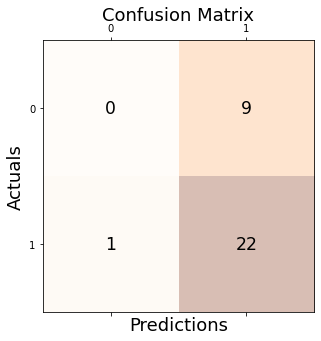

LinearSVC
Recall: 0.780
Accuracy: 0.781
Precision: 0.742
F1 Score: 0.752


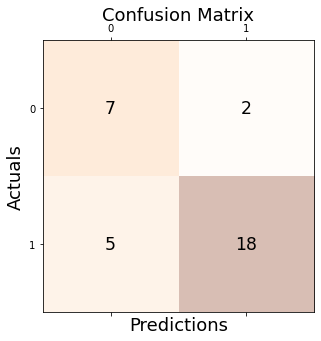

RandomForestClassifier
Recall: 0.700
Accuracy: 0.812
Precision: 0.807
F1 Score: 0.726


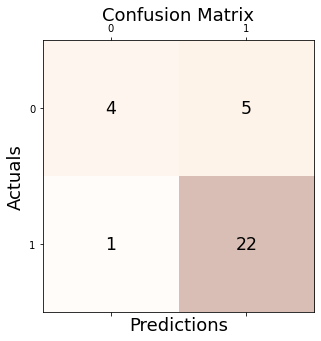

SGDClassifier
Recall: 0.650
Accuracy: 0.594
Precision: 0.623
F1 Score: 0.584


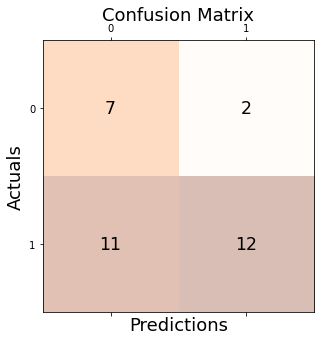

LogisticRegression
Recall: 0.756
Accuracy: 0.844
Precision: 0.840
F1 Score: 0.782


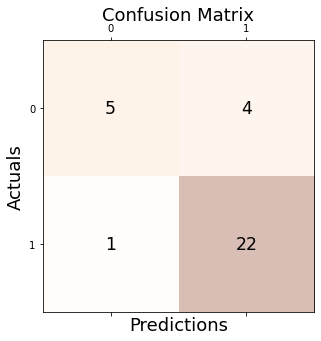

KNN
Recall: 0.604
Accuracy: 0.625
Precision: 0.587
F1 Score: 0.584


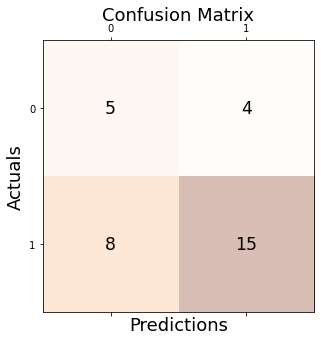

In [41]:
# train classifier
import pickle
classifier = ['SVC - rbf', 'LinearSVC', 'RandomForestClassifier', 'SGDClassifier', 'LogisticRegression', 'KNN']
predictions = []
#SVC
################################################################################
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
# predict
y_pred_svc = clf.predict(X_test)
predictions.append(y_pred_svc)

svc = SVC()

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/solution_initated_model_' + classifier[0] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

#LinearSVC
################################################################################
lsvc = LinearSVC(verbose=0, random_state=123)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(X_train_res, y_train_res)
score = lsvc.score(X_train_res, y_train_res)
#print(" LinearSVC Score: ", score)
y_pred_linearsvc = lsvc.predict(X_test)
predictions.append(y_pred_linearsvc)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/solution_initated_model_' + classifier[1] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

# RandomForestRegressor
################################################################################

forest = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=110, bootstrap=True)
forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_test)
predictions.append(y_pred)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/solution_initated_model_' + classifier[2] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

# SGDClassifier
################################################################################

clf = linear_model.SGDClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
predictions.append(y_pred)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/solution_initated_model_' + classifier[3] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

# Logistic Regression
################################################################################

from sklearn.linear_model import LogisticRegression
clf_reg = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred = clf_reg.predict(X_test)
predictions.append(y_pred)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/solution_initated_model_' + classifier[4] + '.sav'
pickle.dump(clf_reg, open(filename, 'wb'))

# KNN
#################################################################################
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_res, y_train_res)
y_pred_neigh = neigh.predict(X_test)
predictions.append(y_pred_neigh)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/solution_initated_model_' + classifier[5] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

#rforest = RandomForestClassifier(random_state=123)
#dtree = DecisionTreeClassifier()

for i, clf in enumerate(classifier):
    print(clf)
    print('Recall: %.3f' % recall_score(y_test, predictions[i], average='macro'))
    print('Accuracy: %.3f' % accuracy_score(y_test, predictions[i]))
    print('Precision: %.3f' % precision_score(y_test, predictions[i], average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, predictions[i], average='macro'))

    # Calculate the confusion matrix
    #
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions[i])
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [42]:
# Save prediction

# import excel
df_prediction = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_solution_merging_features_and_labels.xlsx", sheet_name=0, na_values="NaN")

In [51]:
df_prediction.shape

(67171, 85)

In [53]:
X = df_prediction[provided_features]

In [54]:
X.shape

(67171, 14)

In [55]:
# drop irrelevant columns
# update feature list
to_remove = ['stop_words_count(Solution)', 'words_count_no_stop_words(Solution)', 'sentiment_score(Solution)', 'special_characters(Solution)', 'words_count(Solution)', 'nouns_count(Solution)', 'bulleted_list(Solution)', 'Gunning(Solution)', 'Coleman(Solution)'] # 'verbs_count', 'stop_words_count', 'words_count']
to_remove.extend(lst_low_variance)

for tr in to_remove:
    if tr in X:
        X.drop([tr], axis=1, inplace=True)
        provided_features.remove(tr)


In [56]:
y_prediction = clf_reg.predict(X)

X has feature names, but LogisticRegression was fitted without feature names


In [57]:
len(y_prediction)

67171

In [58]:
df_prediction['solution_quality_prediction'] = y_prediction

In [59]:
# Save excel with predictions based on clf_reg

df_prediction.to_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_solution_quality_scoring.xlsx")


## SHAP (RandomForest)

In [18]:
features_list = provided_features

Average Impact on model output magnitude

In [30]:
X_train_res.shape

(194, 15)

In [31]:
len(provided_features)

15

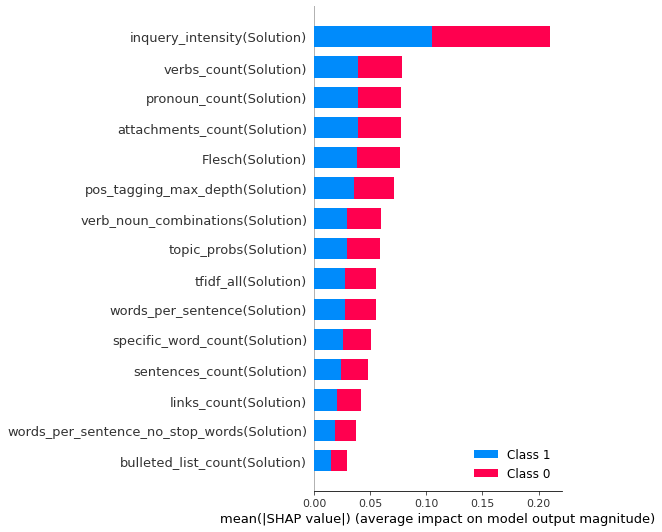

In [28]:
shap_values = shap.TreeExplainer(forest).shap_values(X_train_res)
shap.summary_plot(shap_values, X_train_res, plot_type="bar", feature_names=features_list)

In [ ]:
#explainer = shap.Explainer(forest, X_train_res)
#shap_values = explainer(X_train_res)
#shap.plots.waterfall(shap_values[0])

For Low Quality Prediction [0]

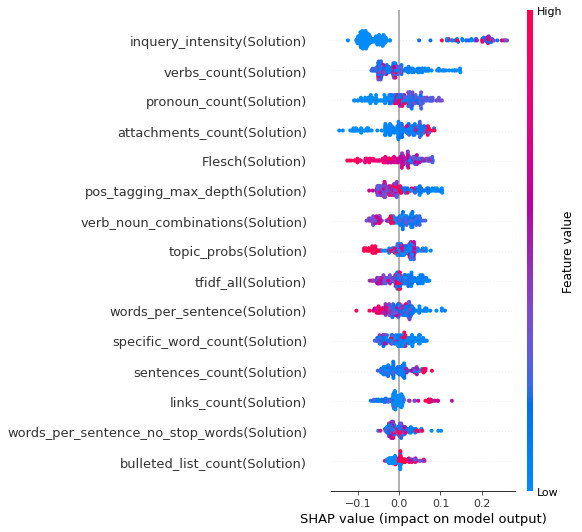

In [29]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values[0], X_train_res, feature_names=features_list)
f.savefig("/summary_plot_0.png", bbox_inches='tight', dpi=600)

For High Quality Prediction [1]

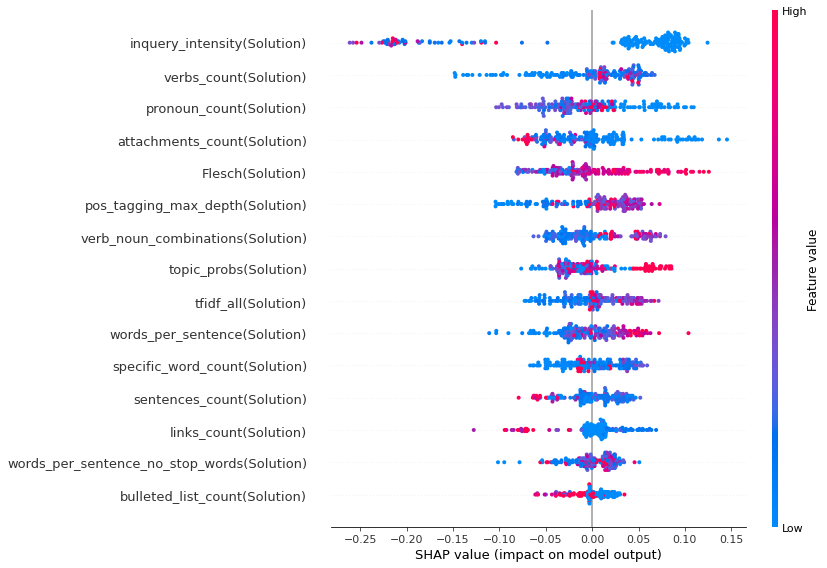

In [32]:
f = plt.figure()
shap.summary_plot(shap_values[1], X_train_res, feature_names=features_list, plot_size=[12,8])
f.savefig("/summary_plot_1.png", bbox_inches='tight', dpi=600)

This plot is made of many dots. Each dot has three characteristics:

Vertical location shows what feature it is depicting
Color shows whether that feature was high or low for that row of the dataset
Horizontal location shows whether the effect of that value caused a higher or lower prediction.

https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values


## Importance Values (RandomForest)

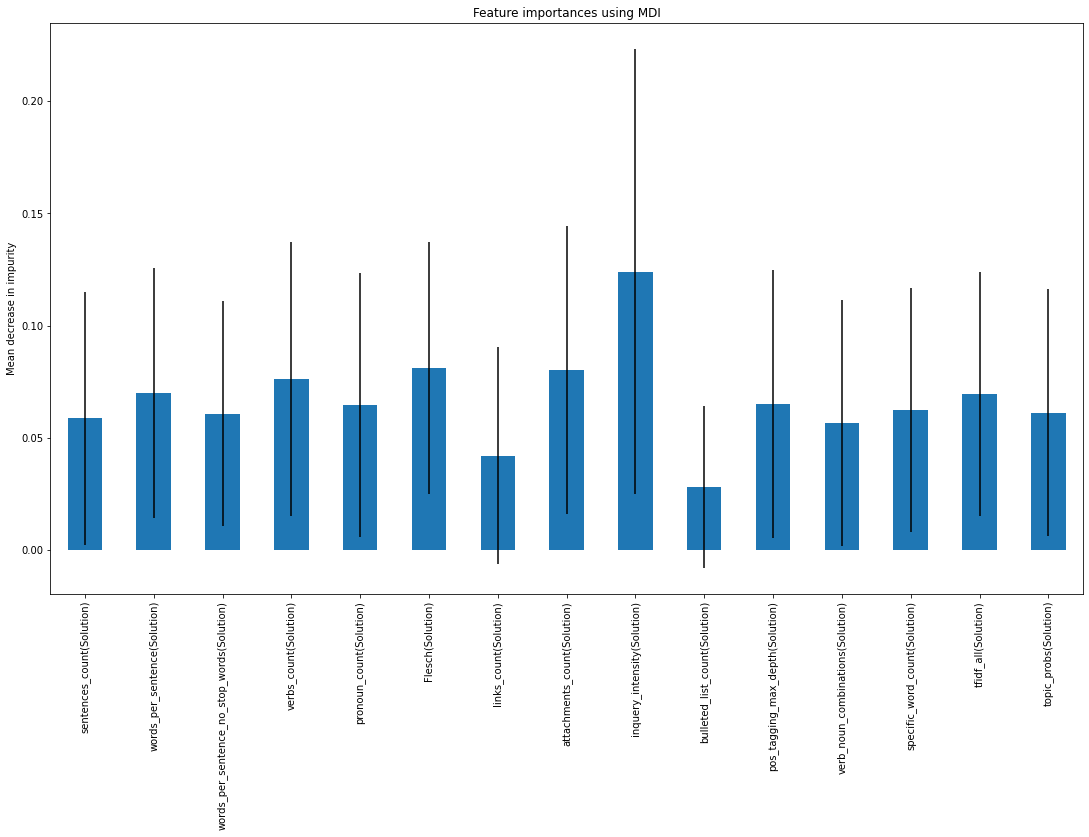

In [33]:
import time
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=features_list)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.set_size_inches(18.5, 10.5)
plt.savefig('MDI_importances_initial.png')

## Select K **Best**

In [34]:
X = df[features_list]

selector = SelectKBest(mutual_info_classif, k=10)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
print("---------------------------------------------")
print("Selected Columns")
selected_columns

---------------------------------------------
Selected Columns


['verbs_count(Solution)',
 'pronoun_count(Solution)',
 'Flesch(Solution)',
 'links_count(Solution)',
 'attachments_count(Solution)',
 'inquery_intensity(Solution)',
 'verb_noun_combinations(Solution)',
 'specific_word_count(Solution)',
 'tfidf_all(Solution)',
 'topic_probs(Solution)']

### New model on SKB

(194, 10)
1.0    97
0.0    97
Name: solution_labels_merged, dtype: int64
LinearSVC(random_state=123)


Liblinear failed to converge, increase the number of iterations.


SVC - rbf
Recall: 0.478
Accuracy: 0.688
Precision: 0.355
F1 Score: 0.407


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


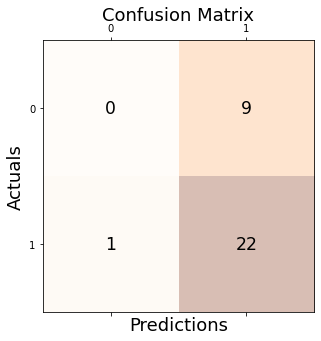

LinearSVC
Recall: 0.623
Accuracy: 0.750
Precision: 0.689
F1 Score: 0.634


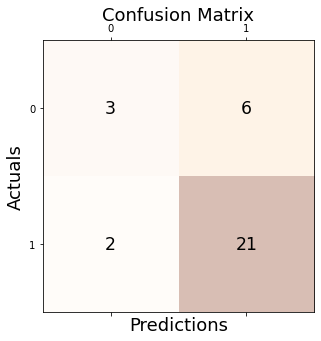

RandomForestClassifier
Recall: 0.756
Accuracy: 0.844
Precision: 0.840
F1 Score: 0.782


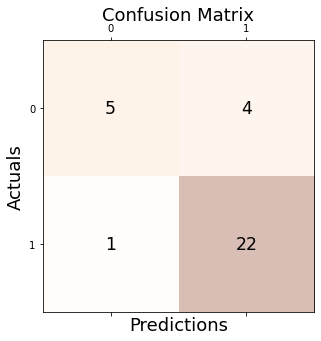

SGDClassifier
Recall: 0.717
Accuracy: 0.594
Precision: 0.705
F1 Score: 0.593


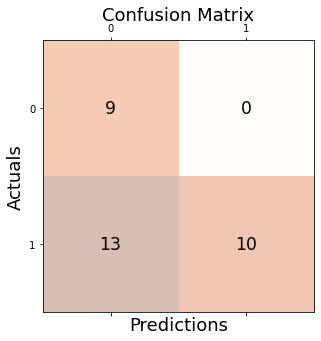

LogisticRegression
Recall: 0.756
Accuracy: 0.844
Precision: 0.840
F1 Score: 0.782


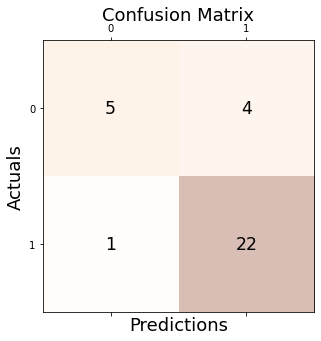

KNN
Recall: 0.700
Accuracy: 0.812
Precision: 0.807
F1 Score: 0.726


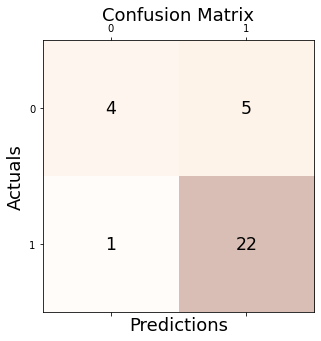

In [35]:
X = df[selected_columns]

#Split into two sets of training and testing data

# Select features for model initialization
X_numpy = X.to_numpy()

X_train_res, X_test, y_train_res, y_test = train_test_split(X_numpy, y, test_size=0.2, random_state=42, shuffle=True)

# Oversampling the data
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)

print(X_train_res.shape)
print(y_train_res.value_counts())

# train classifier

classifier = ['SVC - rbf', 'LinearSVC', 'RandomForestClassifier', 'SGDClassifier', 'LogisticRegression', 'KNN']
predictions = []
#SVC
################################################################################
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
# predict
y_pred_svc = clf.predict(X_test)
predictions.append(y_pred_svc)

svc = SVC()

#LinearSVC
################################################################################
lsvc = LinearSVC(verbose=0, random_state=123)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(X_train_res, y_train_res)
score = lsvc.score(X_train_res, y_train_res)
#print(" LinearSVC Score: ", score)
y_pred_linearsvc = lsvc.predict(X_test)
predictions.append(y_pred_linearsvc)

# RandomForestRegressor
################################################################################

forest = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=110, bootstrap=True)
forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_test)
predictions.append(y_pred)

# SGDClassifier
################################################################################

clf = linear_model.SGDClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
predictions.append(y_pred)

# Logistic Regression
################################################################################

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
predictions.append(y_pred)

# KNN
#################################################################################
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred_neigh = neigh.predict(X_test)
predictions.append(y_pred_neigh)

#rforest = RandomForestClassifier(random_state=123)
#dtree = DecisionTreeClassifier()

for i, clf in enumerate(classifier):
    print(clf)
    print('Recall: %.3f' % recall_score(y_test, predictions[i], average='macro'))
    print('Accuracy: %.3f' % accuracy_score(y_test, predictions[i]))
    print('Precision: %.3f' % precision_score(y_test, predictions[i], average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, predictions[i], average='macro'))

    # Calculate the confusion matrix
    #
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions[i])
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

## Feature Importance & Coefficients (Logistic Regression)



Feature:  sentences_count(Problem) Score:  (0, 0.23065166190845912)
Feature:  words_per_sentence(Problem) Score:  (1, 0.21422470989550096)
Feature:  words_per_sentence_no_stop_words(Problem) Score:  (2, 0.31922328211336043)
Feature:  verbs_count(Problem) Score:  (3, -0.00696359522384964)
Feature:  pronoun_count(Problem) Score:  (4, -0.3761954883332739)
Feature:  Flesch(Problem) Score:  (5, -0.05148581240748647)
Feature:  Coleman(Problem) Score:  (6, -0.25812411880596675)
Feature:  Gunning(Problem) Score:  (7, 0.24536135861199812)
Feature:  links_count(Problem) Score:  (8, 0.6058181049939599)
Feature:  attachments_count(Problem) Score:  (9, -0.19405400043974796)
----------------------------------------------------------------
List of high importance features:  ['sentences_count(Problem)', 'words_per_sentence(Problem)', 'words_per_sentence_no_stop_words(Problem)', 'pronoun_count(Problem)', 'Coleman(Problem)', 'Gunning(Problem)', 'links_count(Problem)', 'attachments_count(Problem)']
List 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ValueError: ignored

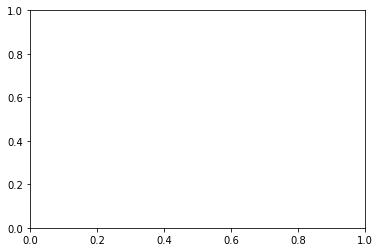

In [ ]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
low_importance = []
high_importance = []
threshold = 0.075
for i,v in enumerate(importance):
	if abs(v) > threshold:
		high_importance.append(features_list[i])
	else:
		low_importance.append(features_list[i])
	print('Feature: ', features_list[i],'Score: ', (i,v))

print("----------------------------------------------------------------")
print("List of high importance features: ", high_importance)
print("List of low importance features: ", low_importance)
# plot feature importance
y_pos = range(len(features_list))
plt.bar(y_pos, importance)
plt.xticks(y_pos, features_list, rotation=45)
pyplot.savefig('Coeff_first_iteration.png')
pyplot.show()

# SHAP (Logistic Regression)

In [36]:
import time
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=features_list_for_regression)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('MDI_importances_initial.png')

NameError: ignored

# 02_Improved Model

In [37]:
X = df[features_list]

In [38]:
# drop irrelevant columns
# update feature list
to_remove = ['links_count(problem)', 'words_per_sentence_no_stop_words(Problem)', 'language_confidence(Problem)', 'bulleted_list_count(Problem)', 'Coleman(Problem)', 'Gunning(Problem)', 'sentences_count(Problem)', 'topic_probs(Solution)'] # 'verbs_count', 'stop_words_count', 'words_count']
to_remove.extend(lst_low_variance)

for tr in to_remove:
    if tr in X:
        X.drop([tr], axis=1, inplace=True)
        provided_features.remove(tr)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
#Split into two sets of training and testing data

# Select features for model initialization
X_numpy = X.to_numpy()

X_train_res, X_test, y_train_res, y_test = train_test_split(X_numpy, y, test_size=0.2, random_state=42, shuffle=True)

# Oversampling the data
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)

#print(X_train_res.shape)
#print(y_train_res.value_counts())

LinearSVC(random_state=123)


Liblinear failed to converge, increase the number of iterations.


SVC - rbf
Recall: 0.478
Accuracy: 0.688
Precision: 0.355
F1 Score: 0.407


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


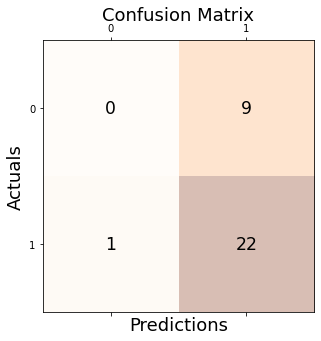

LinearSVC
Recall: 0.780
Accuracy: 0.781
Precision: 0.742
F1 Score: 0.752


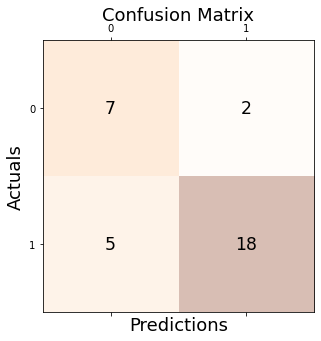

RandomForestClassifier
Recall: 0.700
Accuracy: 0.812
Precision: 0.807
F1 Score: 0.726


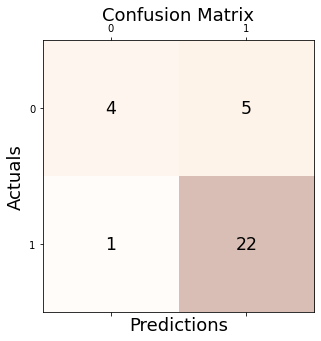

SGDClassifier
Recall: 0.534
Accuracy: 0.719
Precision: 0.617
F1 Score: 0.506


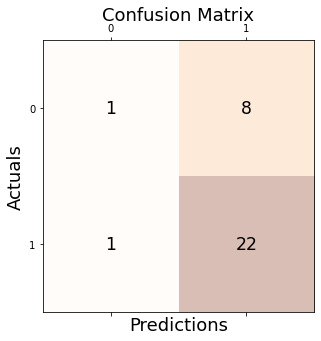

LogisticRegression
Recall: 0.756
Accuracy: 0.844
Precision: 0.840
F1 Score: 0.782


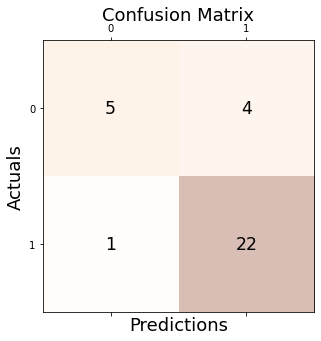

KNN
Recall: 0.604
Accuracy: 0.625
Precision: 0.587
F1 Score: 0.584


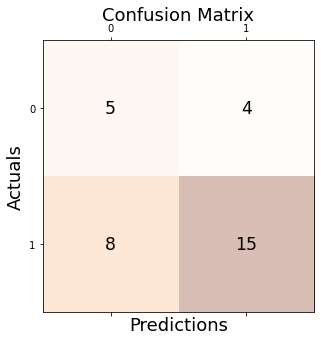

In [40]:
# train classifier

classifier = ['SVC - rbf', 'LinearSVC', 'RandomForestClassifier', 'SGDClassifier', 'LogisticRegression', 'KNN']
predictions = []
#SVC
################################################################################
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
# predict
y_pred_svc = clf.predict(X_test)
predictions.append(y_pred_svc)

svc = SVC()

#LinearSVC
################################################################################
lsvc = LinearSVC(verbose=0, random_state=123)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(X_train_res, y_train_res)
score = lsvc.score(X_train_res, y_train_res)
#print(" LinearSVC Score: ", score)
y_pred_linearsvc = lsvc.predict(X_test)
predictions.append(y_pred_linearsvc)

# RandomForestRegressor
################################################################################

forest = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=110, bootstrap=True)
forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_test)
predictions.append(y_pred)

# SGDClassifier
################################################################################

clf = linear_model.SGDClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
predictions.append(y_pred)

# Logistic Regression
################################################################################

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
predictions.append(y_pred)

# KNN
#################################################################################
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_res, y_train_res)
y_pred_neigh = neigh.predict(X_test)
predictions.append(y_pred_neigh)
#rforest = RandomForestClassifier(random_state=123)
#dtree = DecisionTreeClassifier()

for i, clf in enumerate(classifier):
    print(clf)
    print('Recall: %.3f' % recall_score(y_test, predictions[i], average='macro'))
    print('Accuracy: %.3f' % accuracy_score(y_test, predictions[i]))
    print('Precision: %.3f' % precision_score(y_test, predictions[i], average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, predictions[i], average='macro'))

    # Calculate the confusion matrix
    #
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions[i])
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

#03_Hyperparameter Tuning